In [1]:
#Librerias que vamos a utilizar
import numpy as np
import pyhdf.SD
from pyhdf.SD import SD,SDC #Necesitamos la libreria pyhdf para leer archivos y SD una clase
import glob #una libreria que usamos
import pandas as pd
import matplotlib.pyplot as plt
import re #liberia para regex que luego usaremos en texto

In [2]:
#Lectura de archivos de calibrated radiance

#Ruta donde se encuentran los archivos hdf
DataPath = 'archivos'

#Generamos una variable con todos los archivos de la carpeta
Filelist = glob.glob(DataPath+'/*')

#Mostramos por pantalla
print(Filelist)

['archivos/MOD021KM.A2022224.1430.006.2022225012914.hdf', 'archivos/MOD021KM.A2022091.1415.006.2022092022447(2).hdf']


In [4]:
#Elegimos el archivo con el que vamos a trabajar segun el indice 

n_file = 1

#Abrimos el archivo: SD una clase de la libreria pyhdf junto con el READ lo utilizamos
#para leer el archivo

File = SD(Filelist[n_file],SDC.READ)

#Mostramos informacion de nuestro archivo hdf

print(File.info()) 


(31, 58)


In [6]:
def lee_archivo(File):
    archivo = SD(File,SDC.READ)
    return archivo

Nuestro archivo hdf contiene 31 sds (Datasets). Para ver esto de forma mas detallada utilizamos la funcion "visualiza_hdf" que nos devuelve una tabla con la informacion de los sds.

#Metadata 

Vamos a trabajar con lo que se conoce como el metadata de nuestro archivo HDF. Esto lo hacemos debido a que dentro de él, tenemos algunos datos interesantes como lo son la fecha y la hora en la que se scaneo la información. Lo vamos a obtener utilizando el metodo attributes() que luego volveremos a ver. 

In [4]:
#File.attributes() #ejecutar para observar el metadata

Se trata de un diccionario que contiene informacion. Generemos una tabla donde podamos observarla un poco mejor

In [5]:
#pd.DataFrame(File.attributes().keys()) #ejecutar para ver en formato tabla

De este diccionario nos va a interesar el contenido de "CoreMetadata.0" que segun la documentación de https://ladsweb.modaps.eosdis.nasa.gov/filespec/MODIS/5/MOD03 tiene información sobre hora y fecha.
Al extraer el metadata lo obtendremos en formato "string".


In [5]:
meta_data = File.attributes()["CoreMetadata.0"]
print(type(meta_data))
print(meta_data)


<class 'str'>

GROUP                  = INVENTORYMETADATA
  GROUPTYPE            = MASTERGROUP

  GROUP                  = ECSDATAGRANULE

    OBJECT                 = REPROCESSINGPLANNED
      NUM_VAL              = 1
      VALUE                = "further update is anticipated"
    END_OBJECT             = REPROCESSINGPLANNED

    OBJECT                 = REPROCESSINGACTUAL
      NUM_VAL              = 1
      VALUE                = "processed once"
    END_OBJECT             = REPROCESSINGACTUAL

    OBJECT                 = LOCALGRANULEID
      NUM_VAL              = 1
      VALUE                = "MOD021KM.A2022091.1415.006.2022092022447.hdf"
    END_OBJECT             = LOCALGRANULEID

    OBJECT                 = DAYNIGHTFLAG
      NUM_VAL              = 1
      VALUE                = "Day"
    END_OBJECT             = DAYNIGHTFLAG

    OBJECT                 = PRODUCTIONDATETIME
      NUM_VAL              = 1
      VALUE                = "2022-04-02T02:24:47.000Z"
    END_OBJECT

In [7]:
#Formato de la fecha segun la documentacion YYYY-MM-DD
patron_fecha = r'(\d{4})-(\d{2})-(\d{2})'

#Busco en el texto la primera fecha. Conociendo la manera en la que se almacena la 
#informacion. Se que va a encontrar la fecha correcta. Solo almacene 5 min de datos
fecha = re.search(patron_fecha,meta_data)[0]

print(fecha)

2022-04-02


In [28]:
#Generamos una regex con el formato \b(?:word_a\W+(?:\w+\W+){0,20}?word_b)\b
#Busca en meta_data una seccion del texto donde se halla informacion sobre el inicio
#de la hora del scaneo
info_inicio_hora = re.search(r'\b(?:RANGEBEGINNINGTIME\W+(?:\w+\W+){0,20}?RANGEBEGINNINGTIME)\b',meta_data)[0]
patron_hora = r'(\d{2}):(\d{2}):(\d{2})'
re.search(patron_hora,info_inicio_hora)[0]

'14:15:00'

In [21]:
texto_hora =  re.search("\b(?:RANGEBEGINNINGTIME\W+(?:\w+\W+){0,}?RANGEBEGINNINGTIME)\b",meta_data)
print(texto_hora)

None


In [11]:
palabra = File.attributes()["CoreMetadata.0"]
patron_hora = r'(\d{2}):(\d{2}):(\d{2})'
re.findall(patron_hora,palabra)
#https://stackoverflow.com/questions/69825326/converting-time-values-stored-in-a-tuple-into-24-hours-format
#el link de arriba funca si queres hacer la transformacion de tupla a datetime
#pero podrias buscar algo mas tranca
"RANGEBEGINNINGTIME"

[('02', '24', '47'),
 ('14', '08', '16'),
 ('14', '15', '00'),
 ('14', '20', '00')]

In [51]:
palabra = File.attributes()["CoreMetadata.0"]
patron = '(\d{2}):(\d{2}):(\d{2})'
print(re.search(patron,palabra))

<re.Match object; span=(957, 965), match='02:24:47'>


In [64]:
texto = "andandsa adad ·3311111111dfd 13:23:SS pero tmb RANGEDTIME vegnia HH:MM:SS"
patron = '(\d{2}):(\d{2}):(\d{2})'
print(re.search(patron,texto))

None


In [38]:
#quiero buscar un formato "HH:MM:SS que ademas este cerca de rangedatebennig como maximo
#5 palabras
p= "Now aid of come their the country."
a = "/aid\(\W\+\w\+\)\{,3}\W\+country"




TypeError: 'NoneType' object is not subscriptable

In [100]:
#Formato de la hora segun la documentacion "HH:MM:SS.SSSSSS" 

palabra = vegano.attributes()["CoreMetadata.0"]


In [4]:
def visualiza_hdf(File):
    
    #El modulo datasets (proviene de la libreria pyhdf) me devuelve informacion sobre que
    #hay dentro del hdf. 
    datasets = {"Datasets": list(File.datasets().keys())}
    
    #Lo transformamos a un dataframe para visualizar
    info_file = pd.DataFrame(datasets)
    
    return info_file

visualiza_hdf(File)

,Datasets
0,Latitude
1,Longitude
2,EV_1KM_RefSB
3,EV_1KM_RefSB_Uncert_Indexes
4,EV_1KM_Emissive
5,EV_1KM_Emissive_Uncert_Indexes
6,EV_250_Aggr1km_RefSB
7,EV_250_Aggr1km_RefSB_Uncert_Indexes
8,EV_250_Aggr1km_RefSB_Samples_Used
9,EV_500_Aggr1km_RefSB


Para calcular nuestro indice vamos a necesitar el sds de "EV_500_Aggr1km_RefSB" en el cual vamos a tener valores de reflectancia. Y mas aun las bandas que necesitamos.

In [6]:
#Funcion que pide como argumento un archivo hdf y el dataset que queramos

def selecciona_sds_hdf(File,sds):
    
    #Seleccionamos el dataset con "select" metodo de la libreria pyhdf
    sds_seleccionado = File.select(sds)
    
    return sds_seleccionado

In [7]:
#Toma como argumento un archivo hdf y el dataset que desee extraer

def extrae_datos_hdf(File,sds):
    
    #Seleccionamos el dataset con la funcion
    dataset = selecciona_sds_hdf(File,sds)
    
    #Extraemos los datos con el metodo get de pyhdf
    sds_datos = dataset.get()
    
    #Devuelve los datos y su dimension
    return sds_datos,sds_datos.shape

Para ver que informacion "atributos" tenemos en nuestro dataset vamos a utilizar la funcion "muestra_atributos_sds" la cual nos entrega una tabla donde los visualizamos.

In [8]:
def selecciona_atributos_sds(File,sds):
    
    #Seleccionamos el dataset
    dataset = selecciona_sds_hdf(File,sds)
    
    #Utilizamos el metodo attribute, nos devuelve un diccionario con una descripcion
    #global de cada atributo adjunto al archivo hdf
    dic_atributos = dataset.attributes()
    
    return dic_atributos
    

In [9]:
#Input : File y un dataset
def muestra_atributos_sds(File,sds):
    
    dic_atributos = selecciona_atributos_sds(File,sds)
        
    #Tomamos las llaves y valores del diccionario y los transformamos en listas
    #para luego generar una tabla y visualizarlo
    columna1 = list(dic_atributos.keys())
    columna2 = list(dic_atributos.values())
    
    #Generamos una tabla/dataframe
    df = pd.DataFrame({"":columna1,"Atributos":columna2})
    df = df.set_index("")
    
    #Regresa una tabla donde se muestran los atributos del dataset
    return df

In [10]:
muestra_atributos_sds(File,"EV_500_Aggr1km_RefSB")

,Atributos
,
long_name,Earth View 500M Aggregated 1km Reflective Sola...
units,none
valid_range,"[0, 32767]"
_FillValue,65535
band_names,"3,4,5,6,7"
radiance_scales,"[0.04213636741042137, 0.034364331513643265, 0...."
radiance_offsets,"[-0.0, -0.0, -0.0, -0.0, -0.0]"
radiance_units,Watts/m^2/micrometer/steradian
reflectance_scales,"[6.510046659968793e-05, 5.9409430832602084e-05..."


In [11]:
#Se elige un file hdf, sds: el dataset que queramos y el atributo del dataset
def extrae_atributos_sds(File,sds,atributo):
    
    #Utilizamos la funcion para generar un diccionario con los atributos
    dic_atributos = selecciona_atributos_sds(File,sds)
    
    #Del diccionario elegimos el atributo que queremos
    attr = dic_atributos[atributo]
    
    #Devuelve una lista con los valores de mi atributo
    return attr

In [12]:
#Extrae los valores de la banda seleccionada ya convertidos a reflectancia

#File hdf, sds: dataset,canal deseado, nombre de atributo con las bandas
def extrae_banda(File,sds,band,nombre_atributo):
    
    #Extraemos los valores de reflectancia sin conversion
    REF = extrae_datos_hdf(File,sds)[0]
    
    #Extraemos los numeros de bandas que tenemos. Ej:band 1, band2
    #Spliteamos para operar en ellas
    n_bands = extrae_atributos_sds(File,sds,nombre_atributo).split(",")
    
    #Elegimos la banda
    
    posicion_band = n_bands.index(str(band))
    
    
    #Hacemos la conversion
    
    rad_off_ref= extrae_atributos_sds(File,sds,"reflectance_offsets")[posicion_band]
    
    rad_scales_ref = extrae_atributos_sds(File,sds,"reflectance_scales")[posicion_band]
    
    canal = rad_scales_ref * (REF[posicion_band,:,:] - rad_off_ref)
    
    return canal
    
    
    
    

In [13]:
def indice_nbr(File,sds,nombre_atributo):
    
    #Extraemos las bandas con las cuales vamos a trabajar
    canal_5 = extrae_banda(File,sds,5,nombre_atributo)
    canal_7 = extrae_banda(File,sds,7,nombre_atributo)
    
    #Calculamos el indice NBR
    nbr = (canal_5 - canal_7) / (canal_5 + canal_7)
    
    #array con los valores de nbr
    return nbr    

Una vez que conocemos que tenemos dentro de nuestros archivos hdf, podemos calcular el NBR para las fechas que queramos

In [31]:
#La lista donde habiamos almacenado los archivos hdf 

#Indice del archivo donde tenemos datos previos al foco del incendio
n_file = 1

#Nuestro archivo con informacion sobre antes del evento
pre_archivo = SD(Filelist[n_file],SDC.READ)

#NBR previo al foco del incendio
nbr_pre = indice_nbr(pre_archivo,"EV_500_Aggr1km_RefSB","band_names")

In [32]:
#Indice del archivo donde tenemos datos posteriores al foco del incendio
n_file = 0

#Nuestro archivo con informacion sobre antes del evento
post_archivo = SD(Filelist[n_file],SDC.READ)

#NBR post foco al incendio
nbr_post = indice_nbr(post_archivo,"EV_500_Aggr1km_RefSB","band_names")

In [33]:
#Diferencia de NBR
d_nbr = nbr_pre - nbr_post

Lectura de archivos de Geolocalizacion


In [34]:
#Ruta donde se encuentran los archivos hdf
DataPath = 'geolocation'

#Generamos una variable con todos los archivos de la carpeta
Filelist_geo = glob.glob(DataPath+'/*')

#Mostramos por pantalla
print(Filelist_geo)

['geolocation/MOD03.A2022091.1415.006.2022091212727(1).hdf', 'geolocation/MOD03.A2022091.1415.006.2022091212727.hdf']


In [35]:
#Elegimos el archivo con el que vamos a trabajar segun el indice 

n_file = 0

#Abrimos el archivo

File_geo = SD(Filelist_geo[n_file],SDC.READ)

#Mostramos informacion de nuestro archivo hdf

print(File_geo.info()) 

(46, 27)


In [19]:
visualiza_hdf(File_geo)

,Datasets
0,Latitude
1,Longitude
2,Scan Offset
3,Track Offset
4,Height Offset
5,Height
6,SensorZenith
7,SensorAzimuth
8,Range
9,SolarZenith


In [36]:
LAT_pre = extrae_datos_hdf(File_geo,"Latitude")[0]
LON_pre = extrae_datos_hdf(File_geo,"Longitude")[0]

In [37]:
LAT_post = extrae_datos_hdf(File_geo,"Latitude")[0]
LON_post = extrae_datos_hdf(File_geo,"Longitude")[0]

In [38]:
from matplotlib.ticker import FixedLocator
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter


Graficos

In [39]:
# Cargamos los límites de países y provincias para poder graficarlas en los mapas

states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none',edgecolor='white')

countries = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_0_countries',
        scale='10m',
        facecolor='none',edgecolor='blue')

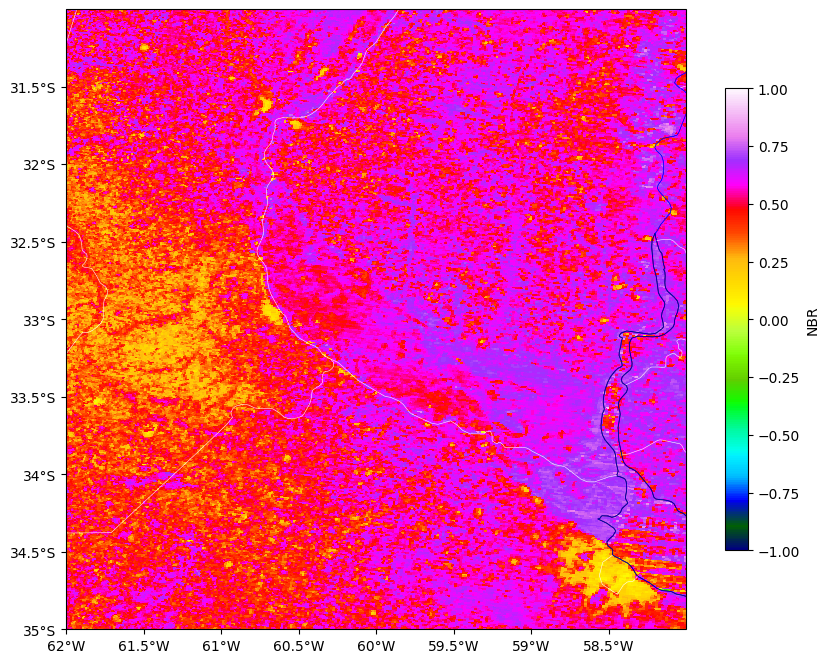

In [28]:
# Definimos los limites del area a visualizar
latnorth=-31
latsouth=-35
lonwest=-62
loneast=-58

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos
    
cm=ax1.pcolormesh(LON_pre,LAT_pre, nbr_pre,cmap='gist_ncar',vmin=-1,vmax=1)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.4)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('NBR',fontsize=10)

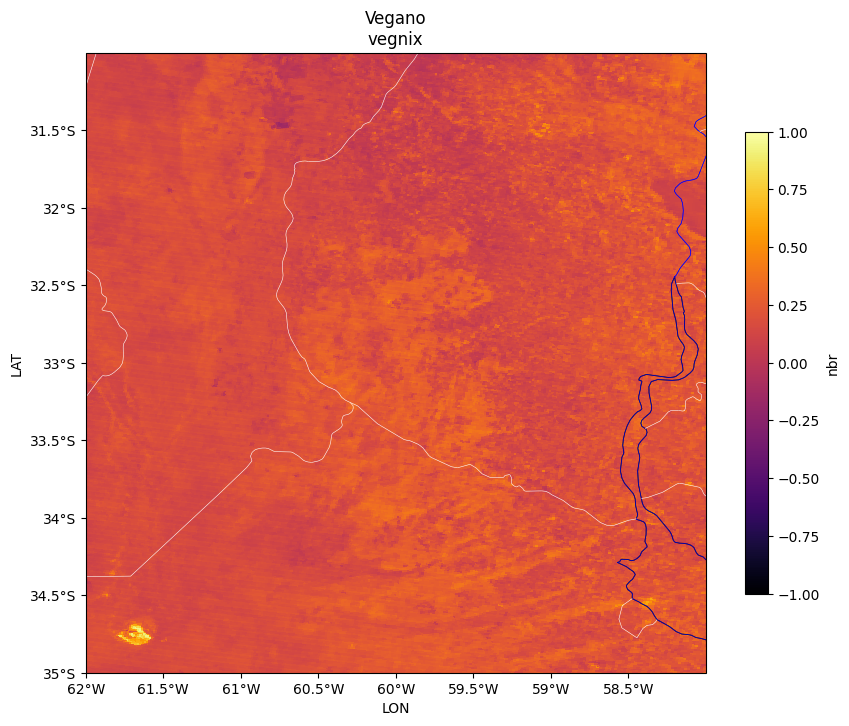

In [49]:
# Definimos los limites del area a visualizar
latnorth=-31
latsouth=-35
lonwest=-62
loneast=-58

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos
    
cm=ax1.pcolormesh(LON_post,LAT_post, nbr_post,cmap='inferno',vmin=-1,vmax=1)

#Ejes
ax1.set_title("Vegano\nvegnix")
ax1.set_ylabel("LAT")
ax1.set_xlabel("LON")

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.4)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('nbr',fontsize=10)

NameError: name 'LON' is not defined

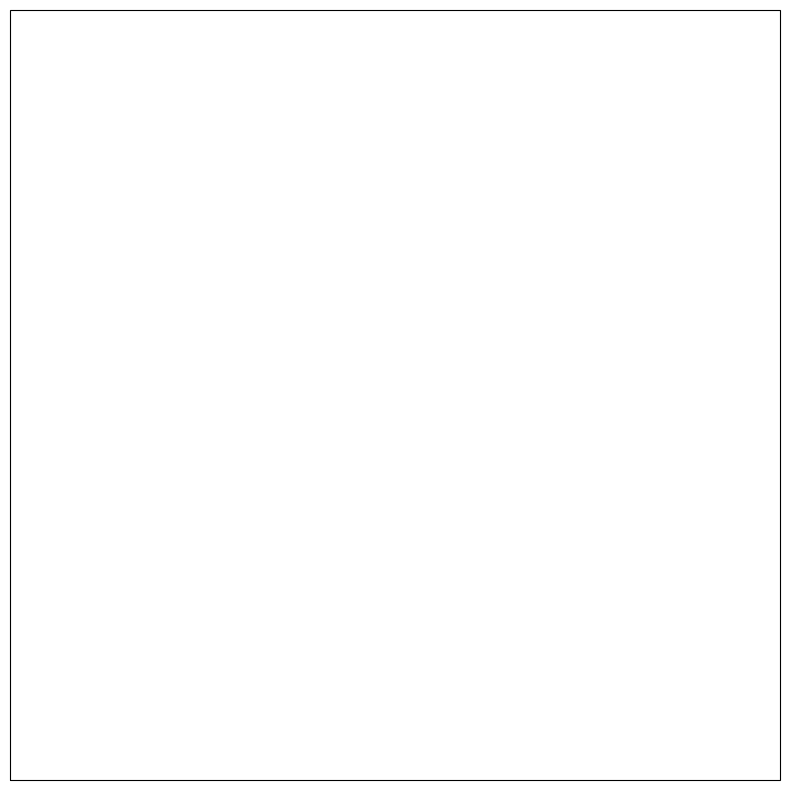

In [45]:
# Definimos los limites del area a visualizar
latnorth=-31
latsouth=-35
lonwest=-62
loneast=-58

fig=plt.figure(figsize=(10,10))
    
ax1 = plt.subplot(1, 1, 1, projection = ccrs.PlateCarree())
    
# Definimos el área de graficado y a qué proyección hay que transformar las coordenadas lat/lon

ax1.set_extent([lonwest, loneast, latsouth, latnorth], crs=ccrs.PlateCarree())

# Graficamos
    
cm=ax1.pcolormesh(LON,LAT, nbr,cmap='gist_ncar',vmin=-0.2,vmax=1)

# Agregamos la línea de costas
ax1.coastlines(resolution='10m',linewidth=0.6)
    
# Agregamos los límites de los países
ax1.add_feature(countries,linewidth=0.4)
    
# Agregamos los límites de las provincias
ax1.add_feature(states_provinces,linewidth=0.4)
    
# Definimos donde aparecen los ticks con las latitudes y longitudes
ax1.set_yticks(np.arange(latsouth,latnorth,0.5), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(lonwest,loneast,0.5), crs=ccrs.PlateCarree())
    
# Le damos formato a las etiquetas de los ticks
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Agregamos la barra de colores 
cbar=plt.colorbar(cm,shrink=0.6)
cbar.set_label('dNBR',fontsize=10)